In [1]:
import pandas as pd

In [2]:
bp = pd.read_csv('Patient_with_abnormal_bloodpressure.csv')

In [3]:
bp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [5]:
bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.mean(),inplace=True)
bp.Pregnancy.fillna(0,inplace=True)
bp.alcohol_consumption_per_day.fillna(0,inplace=True)

In [6]:
bp = bp.drop(['Patient_Number'],axis=1)

In [7]:
bp.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


### Sampling

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
bp_train, bp_test = train_test_split(bp,test_size=0.2)

In [10]:
bp_train_x = bp_train.iloc[:,1::]
bp_train_y = bp_train.iloc[:,0]

In [11]:
bp_test_x = bp_test.iloc[:,1::]
bp_test_y = bp_test.iloc[:,0]

### Model_Buildiong

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(max_depth = 3,class_weight = 'balanced')

In [32]:
dt.fit(bp_train_x,bp_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

### Prediction

In [33]:
pred = dt.predict(bp_test_x)
pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

### Confusion Matrics

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
tab = confusion_matrix(bp_test_y,pred)
tab

array([[135,  61],
       [ 26, 178]], dtype=int64)

### Accuracy

In [36]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

78.25

### Recall Score

In [37]:
from sklearn.metrics import recall_score

In [38]:
recall_score(bp_test_y,pred)*100

87.25490196078431

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(bp_test_y,pred)*100

74.47698744769873

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(bp_test_y,pred)*100

80.36117381489841

### important Features

In [43]:
dt.feature_importances_

array([0.25086323, 0.28488046, 0.00497102, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45928529, 0.        ])

In [44]:
bp_train_x.columns

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
       'Sex', 'Pregnancy', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'alcohol_consumption_per_day',
       'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [45]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = bp_train_x.columns
feat_imp['Imp'] = dt.feature_importances_

In [46]:
feat_imp.sort_values('Imp',ascending=False)

,Features,Imp
11,Chronic_kidney_disease,0.459285
1,Genetic_Pedigree_Coefficient,0.284880
0,Level_of_Hemoglobin,0.250863
2,Age,0.004971
3,BMI,0.000000
4,Sex,0.000000
5,Pregnancy,0.000000
6,Smoking,0.000000
7,Physical_activity,0.000000
8,salt_content_in_the_diet,0.000000


In [47]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO

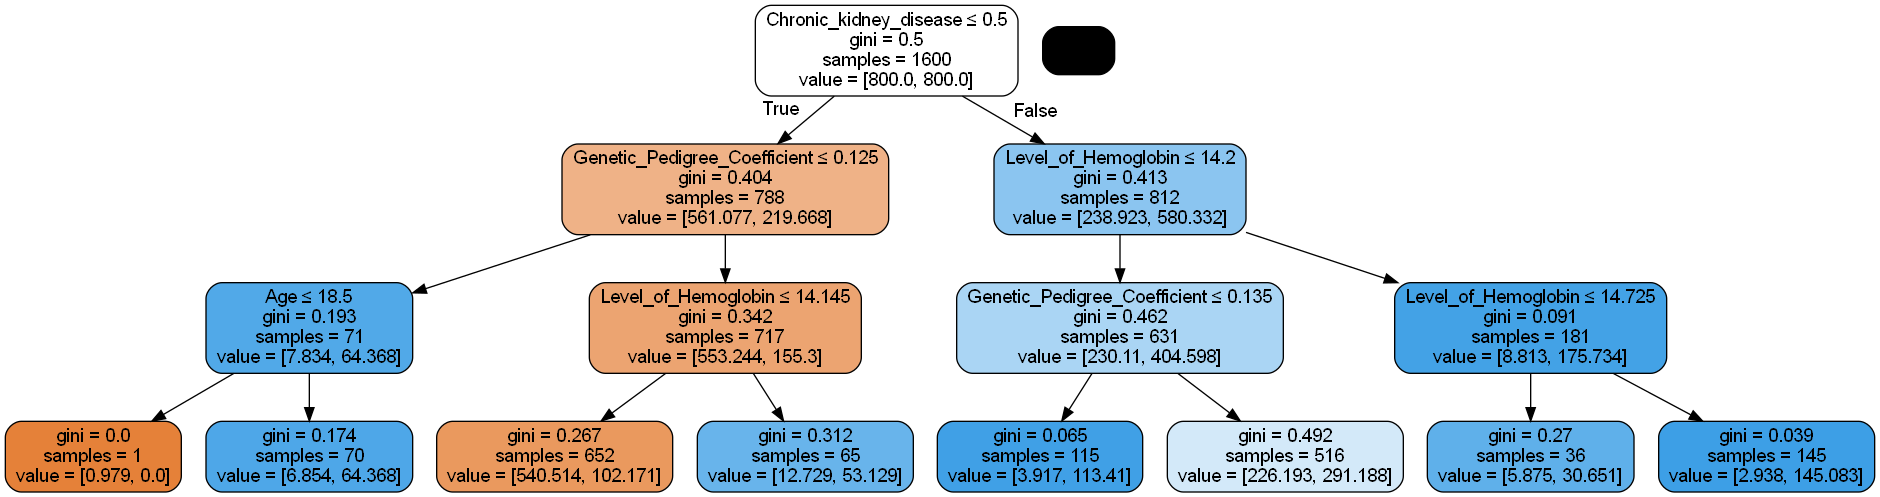

<Figure size 1200x1200 with 0 Axes>

In [48]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=bp_train_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())